In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
data = pd.read_csv('Data/stock-data.csv')
# Reorder the columns for convenience
data = data[['Open', 'High', 'Low', 'Volume', 'Close']]
data.head()

,Open,High,Low,Volume,Close
0,3471.949951,4073.729980,3459.850098,33352380000,3966.110107
1,3950.590088,4289.060059,3615.790039,30916110000,3766.989990
2,3760.949951,4208.729980,3521.139893,33222920000,4206.350098
3,4252.149902,4259.870117,3614.659912,34727330000,3672.820068
4,3714.479980,3714.479980,3026.110107,44129010000,3369.629883


In [3]:
sequence_length = 21 # 20 preceeding inputs
n_features = len(data.columns)
val_ratio = 0.1
n_epochs = 300
batch_size = 512

In [4]:
data = data.as_matrix()
data_processed = []
for index in range(len(data) - sequence_length):
    data_processed.append(data[index : index + sequence_length])
data_processed = np.array(data_processed)

In [5]:
val_split = round((1-val_ratio) * data_processed.shape[0])
train = data_processed[: int(val_split), :]
val = data_processed[int(val_split) :, :]

print('Training data: {}'.format(train.shape))
print('Validation data: {}'.format(val.shape))

Training data: (165, 21, 5)
Validation data: (18, 21, 5)


In [6]:
train_samples, train_nx, train_ny = train.shape
val_samples, val_nx, val_ny = val.shape

train = train.reshape((train_samples, train_nx * train_ny))
val = val.reshape((val_samples, val_nx * val_ny))

preprocessor = MinMaxScaler().fit(train)
train = preprocessor.transform(train)
val = preprocessor.transform(val)

train = train.reshape((train_samples, train_nx, train_ny))
val = val.reshape((val_samples, val_nx, val_ny))

In [7]:
X_train = train[:, : -1]
y_train = train[:, -1][: ,-1]
X_val = val[:, : -1]
y_val = val[:, -1][ : ,-1]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], n_features))

In [8]:
model = Sequential()
model.add(LSTM(input_shape=(X_train.shape[1:]), units = 128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(units=1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")

In [9]:
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=n_epochs,
    verbose=1
    )

Epoch 1/300
165/165 [==============================] - 2s 11ms/step - loss: 0.1913
Epoch 2/300
165/165 [==============================] - 0s 824us/step - loss: 0.0767
Epoch 3/300
165/165 [==============================] - 0s 939us/step - loss: 0.0191
Epoch 4/300
165/165 [==============================] - 0s 939us/step - loss: 0.0236
Epoch 5/300
165/165 [==============================] - 0s 885us/step - loss: 0.0469
Epoch 6/300
165/165 [==============================] - 0s 842us/step - loss: 0.0277
Epoch 7/300
165/165 [==============================] - 0s 970us/step - loss: 0.0157
Epoch 8/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 9/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 10/300
165/165 [==============================] - 0s 764us/step - loss: 0.0140
Epoch 11/300
165/165 [==============================] - 0s 903us/step - loss: 0.0175
Epoch 12/300
165/165 [==============================] - 0s 873us/step - loss: 0

165/165 [==============================] - 0s 939us/step - loss: 0.0047
Epoch 99/300
165/165 [==============================] - 0s 982us/step - loss: 0.0046
Epoch 100/300
165/165 [==============================] - 0s 933us/step - loss: 0.0042
Epoch 101/300
165/165 [==============================] - 0s 976us/step - loss: 0.0038
Epoch 102/300
165/165 [==============================] - 0s 873us/step - loss: 0.0043
Epoch 103/300
165/165 [==============================] - 0s 873us/step - loss: 0.0047
Epoch 104/300
165/165 [==============================] - 0s 1000us/step - loss: 0.0049
Epoch 105/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 106/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 107/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 108/300
165/165 [==============================] - 0s 848us/step - loss: 0.0046
Epoch 109/300
165/165 [==============================] - 0s 1ms/step - los

Epoch 195/300
165/165 [==============================] - 0s 873us/step - loss: 0.0033
Epoch 196/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 197/300
165/165 [==============================] - 0s 921us/step - loss: 0.0034
Epoch 198/300
165/165 [==============================] - 0s 964us/step - loss: 0.0035
Epoch 199/300
165/165 [==============================] - 0s 958us/step - loss: 0.0035
Epoch 200/300
165/165 [==============================] - 0s 976us/step - loss: 0.0037
Epoch 201/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 202/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 203/300
165/165 [==============================] - 0s 952us/step - loss: 0.0041
Epoch 204/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 205/300
165/165 [==============================] - 0s 964us/step - loss: 0.0042
Epoch 206/300
165/165 [==============================] - 0s 93

165/165 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 292/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 293/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 294/300
165/165 [==============================] - 0s 897us/step - loss: 0.0026
Epoch 295/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 296/300
165/165 [==============================] - 0s 915us/step - loss: 0.0029
Epoch 297/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 298/300
165/165 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 299/300
165/165 [==============================] - 0s 964us/step - loss: 0.0029
Epoch 300/300
165/165 [==============================] - 0s 842us/step - loss: 0.0034


In [10]:
preds_val = model.predict(X_val)
diff = []
for i in range(len(y_val)):
    pred = preds_val[i][0]
    diff.append(y_val[i] - pred)

In [11]:
real_min = preprocessor.data_min_[104]
real_max = preprocessor.data_max_[104]
print(preprocessor.data_min_[104])
print(preprocessor.data_max_[104])

preds_real = preds_val * (real_max - real_min) + real_min
y_val_real = y_val * (real_max - real_min) + real_min

1172.060059
5128.279785


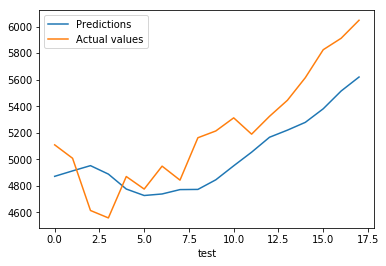

In [12]:
plt.plot(preds_real, label='Predictions')
plt.plot(y_val_real, label='Actual values')
plt.xlabel('test')
plt.legend(loc=0)
plt.show()